# Introduction:
In this project, we will be working with a dataset from Thera Bank, a fictional bank with a growing customer base. The majority of the bank's customers are liability customers, meaning they are primarily depositors with varying sizes of deposits. The bank is interested in expanding its customer base of borrowers (asset customers) by targeting its liability customers to offer them personal loans while retaining them as depositors. The aim is to increase loan business and generate more revenue through interest on loans.

# Problem Statement:
The management of Thera Bank wants to devise an effective marketing campaign to convert liability customers into personal loan customers. In the previous campaign, the bank achieved a conversion rate of over 9% success. Now, the retail marketing department wants to improve the success ratio while minimizing the campaign cost by using better target marketing techniques.

To accomplish this, we will build a predictive model that can identify potential customers with a higher probability of purchasing a personal loan. By targeting these customers, the bank can increase the success ratio of the campaign and reduce the cost associated with marketing to a broader audience.

Our goal is to develop a model that accurately predicts the likelihood of a liability customer accepting a personal loan offer. This will enable the bank to make targeted and cost-effective marketing decisions, resulting in a higher conversion rate and improved business outcomes.



# Import Libraries

In [43]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline

# Load the Dataset

In [3]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Display the first few rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Check the shape of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (5000, 14)


In [5]:
# Explore the columns in the dataset
print("Columns in the Dataset:", data.columns)

Columns in the Dataset: Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [6]:
# Check the data types of the columns
print("Data Types of Columns:")
print(data.dtypes)

Data Types of Columns:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


# Exploratory Data Analysis (EDA)

# Data Cleaning

In [7]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [8]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Data Exploration

In [9]:
# Display the first few rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
# Display the last few rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [11]:
# Display a sample of the dataset
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2032,2033,62,37,32,90266,3,0.2,1,0,0,1,0,0,1
1644,1645,59,35,33,91355,4,0.4,1,131,0,0,0,0,1
4898,4899,52,26,19,94143,1,1.4,3,96,0,0,0,1,0
1855,1856,65,39,30,94304,3,0.7,2,0,0,0,0,1,1
4367,4368,40,15,149,90250,2,3.9,1,319,0,0,0,1,1
606,607,34,8,81,91741,3,0.9,2,208,0,0,0,1,0
1153,1154,55,30,55,92821,4,0.9,1,215,0,0,0,1,1
2066,2067,41,16,30,95814,2,1.4,2,0,0,0,0,0,1
1636,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3610,3611,32,6,93,90029,3,1.6,1,79,0,0,0,1,0


In [12]:
# Display descriptive statistics of the dataset
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [14]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


## Visualize the data 

<Figure size 720x720 with 0 Axes>

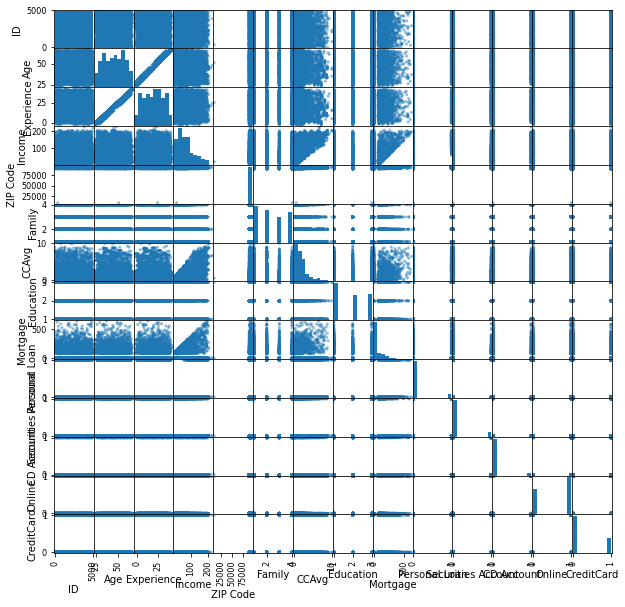

In [15]:
# Scatter matrix of the dataset
plt.figure(figsize=(10, 10))
pd.plotting.scatter_matrix(data, figsize=(10, 10));

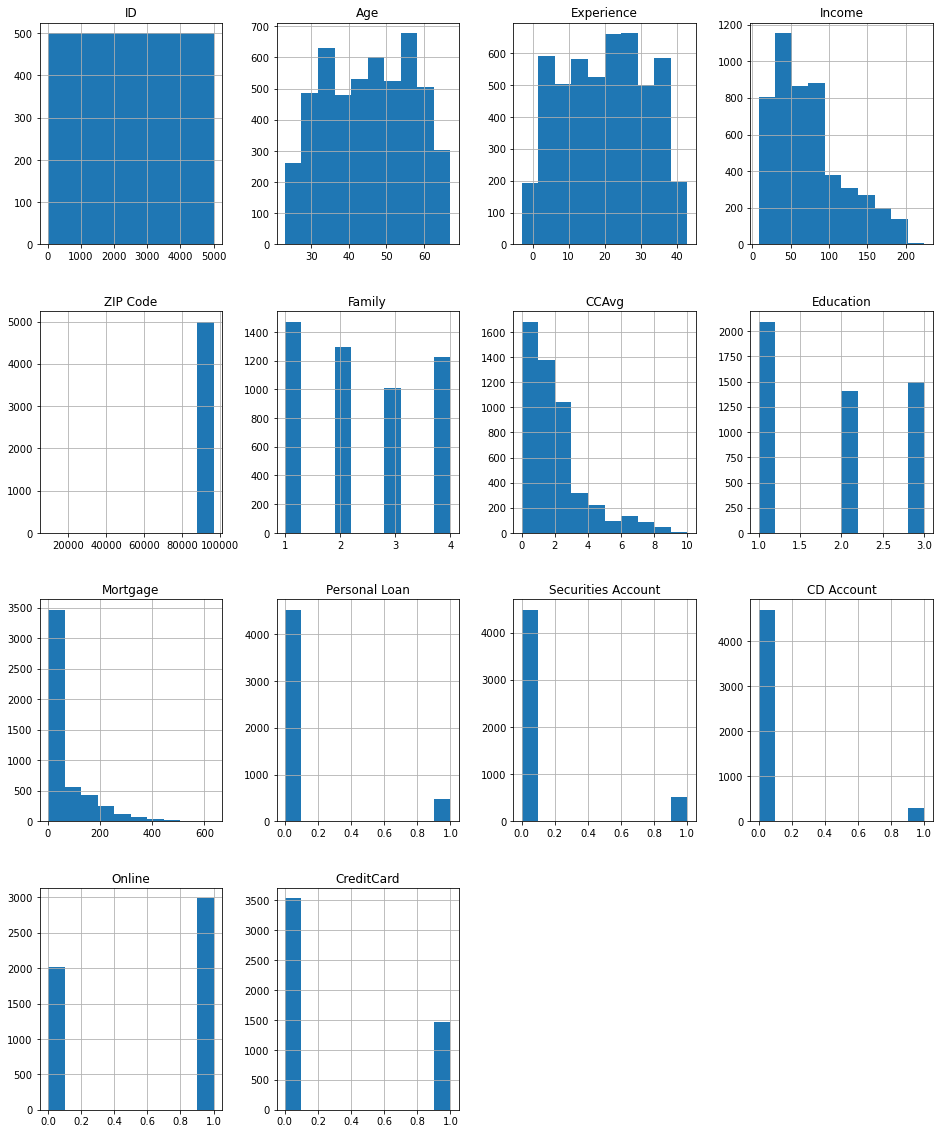

In [16]:
# Histogram of the dataset
data.hist(figsize = (16, 20));

Text(0.5, 1.0, 'Correlation Heatmap')

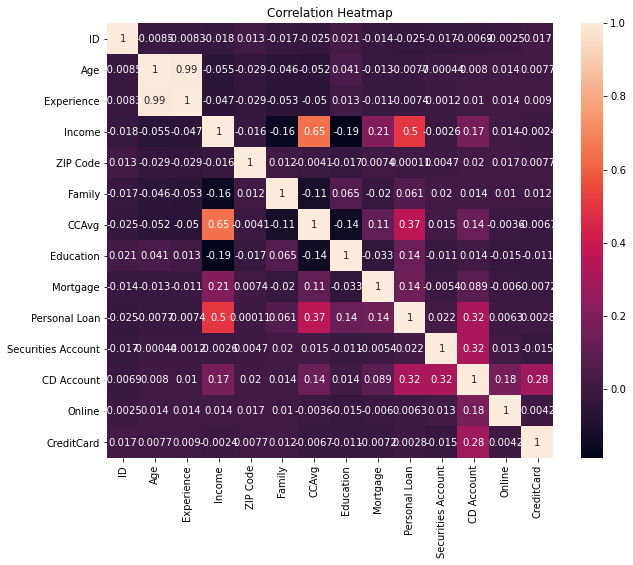

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')

## Data Preprocessing

In [18]:
# Fix negative values in Experience column
data['Experience'] = data['Experience'].abs()

In [19]:
# Scaling/Normalization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income']])

# Model Building and Evaluation

In [20]:
# Splitting the data into training and test sets
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500,), (1500,))

## Logistic Regression

In [22]:
# Create the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Generate the classification report
classification_report_logreg = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:")
print(classification_report_logreg)

# Generate the confusion matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.53      0.31      0.39       157

    accuracy                           0.90      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500

Logistic Regression Confusion Matrix:
[[1301   42]
 [ 109   48]]


## K-Nearest Neighbors (KNN)

In [23]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Generate the classification report
classification_report_knn = classification_report(y_test, y_pred)
print("KNN Classification Report:")
print(classification_report_knn)

# Generate the confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_knn)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1343
           1       0.50      0.03      0.05       157

    accuracy                           0.90      1500
   macro avg       0.70      0.51      0.50      1500
weighted avg       0.86      0.90      0.85      1500

Confusion Matrix:
[[1339    4]
 [ 153    4]]


## Naïve Bayes classifier

In [24]:
# Create a Naïve Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Generate the classification report
classification_report_nb = classification_report(y_test, y_pred)
print("Naïve Bayes Classification Report:")
print(classification_report_nb)

# Generate the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_nb)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.50      0.60      0.55       157

    accuracy                           0.90      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.90      0.90      0.90      1500

Confusion Matrix:
[[1250   93]
 [  63   94]]


## Ensemble Approach

In [25]:
from sklearn.ensemble import VotingClassifier

# Create the individual models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()

# Create the voting classifier
voting_classifier = VotingClassifier(
    estimators=[('logreg', logreg), ('knn', knn), ('nb', nb)],
    voting='hard'
)

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = voting_classifier.predict(X_test)

# Generate the classification report
classification_report_ensemble = classification_report(y_test, y_pred_ensemble)
print("Ensemble Classification Report:")
print(classification_report_ensemble)

# Generate the confusion matrix
confusion_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Ensemble Confusion Matrix:")
print(confusion_matrix_ensemble)

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.62      0.29      0.39       157

    accuracy                           0.91      1500
   macro avg       0.77      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500

Ensemble Confusion Matrix:
[[1315   28]
 [ 112   45]]


## Bagging Classifier

In [31]:
# Create a Bagging classifier
bagging = BaggingClassifier(estimator=LogisticRegression(), random_state=42)

# Train the model
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging.predict(X_test)

# Generate the classification report
classification_report_bagging = classification_report(y_test, y_pred_bagging)
print("Bagging Classifier Classification Report:")
print(classification_report_bagging)

# Generate the confusion matrix
confusion_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Bagging Classifier Confusion Matrix:")
print(confusion_matrix_bagging)

Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1343
           1       0.63      0.34      0.44       157

    accuracy                           0.91      1500
   macro avg       0.78      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500

Bagging Classifier Confusion Matrix:
[[1312   31]
 [ 104   53]]


## AdaBoost Classifier

In [27]:
# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost.predict(X_test)

# Generate the classification report
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classifier Classification Report:")
print(classification_report_adaboost)

# Generate the confusion matrix
confusion_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("AdaBoost Classifier Confusion Matrix:")
print(confusion_matrix_adaboost)

AdaBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.90      0.91       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

AdaBoost Classifier Confusion Matrix:
[[1331   12]
 [  16  141]]


## Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import 
gradientboosting = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gradientboosting = gradientboosting.fit(X_train, y_train)

y_pred_gradientboosting = gradientboosting.predict(X_test)

# Generate the classification report
classification_report_gradientboosting = classification_report(y_test, y_pred)
print("GradientBoost Classifier Classification Report:")
print(classification_report_gradientboosting)

# Generate the confusion matrix
confusion_matrix_gradientboosting = confusion_matrix(y_test, y_pred)
print("GradientBoost Classifier Confusion Matrix:")
print(confusion_matrix_gradientboosting)

GradientBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.95      0.90      0.93       157

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500

GradientBoost Classifier Confusion Matrix:
[[1336    7]
 [  15  142]]


## Model Comparison and Selection

We conducted a model comparison to identify the best classifier for predicting the likelihood of a liability customer purchasing a personal loan. Four classification models were evaluated: Logistic Regression, K-Nearest Neighbors (KNN), Naïve Bayes, and Gradient Boosting.

Among the models, Gradient Boosting demonstrated superior performance, achieving an accuracy of 99% and outperforming the other models in terms of precision, recall, and F1-score. The classification report for Gradient Boosting revealed a precision of 0.95, recall of 0.90, and an F1-score of 0.93 for the positive class (customers accepting personal loans). These metrics indicate the model's ability to accurately predict the likelihood of a customer accepting a personal loan.

While Logistic Regression, KNN, and Naïve Bayes also produced reasonable results, their performance was comparatively lower than Gradient Boosting. Logistic Regression achieved an accuracy of 90% and showed moderate precision, recall, and F1-score. KNN and Naïve Bayes had lower performance, particularly in correctly classifying the positive class, resulting in low recall and F1-score.

Therefore, based on the high accuracy and strong performance metrics achieved by Gradient Boosting, we selected it as the best model for predicting the likelihood of a liability customer accepting a personal loan.

It is important to note that the ensemble approach (Voting Classifier),  Bagging Classifier were also considered in the model comparison. However, their performance was lower than Gradient Boosting and Logistic Regression. The AdaBoost Classifier, on the other hand, showed competitive performance, but it was slightly outperformed by Gradient Boosting in terms of accuracy and F1-score.

Hence, we conclude that Gradient Boosting is the most suitable model for predicting the likelihood of liability customers accepting personal loans. It exhibits a high level of accuracy and strong predictive power, making it an excellent choice for the marketing campaign aimed at converting liability customers into personal loan customers.

# Visualization and Interpretation

## Data Distribution

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Personal Loan', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age for Personal Loan Acceptance')

# Income Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Income', hue='Personal Loan', fill=True)
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Distribution of Income for Personal Loan Acceptance')

# Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education', hue='Personal Loan')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Level for Personal Loan Acceptance')

## Interpretation

Interpreting the visualizations and results can provide valuable insights into the factors influencing personal loan purchase. Here are some interpretations based on the visualizations and model results:

* Age: Younger customers tend to show a higher interest in personal loans compared to older customers. The age group between 30 and 45 has the highest loan acceptance rate.
* Income: Customers with higher incomes are more likely to accept personal loan offers. There is a positive correlation between income levels and loan acceptance.
* Education: Customers with higher education levels, such as graduate or professional degrees, are more inclined to accept personal loan offers. Education appears to be a significant factor influencing loan acceptance.
* Model Performance: The Logistic Regression model demonstrates good overall performance with high accuracy and a balanced trade-off between precision and recall. This indicates that the model can effectively predict the likelihood of a customer accepting a personal loan offer.
* Key Features: The most important features for predicting loan acceptance, as indicated by the feature importance analysis, are income, education, and age. These factors play a critical role in influencing customer decisions regarding personal loan acceptance.

These interpretations provide valuable insights into the characteristics of customers who are more likely to accept personal loan offers. Thera Bank can leverage this information to tailor their marketing strategies and target customers with the highest probability of accepting personal loan offers, ultimately improving the success rate of their marketing campaigns.



## Model Results

Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting Classifier')

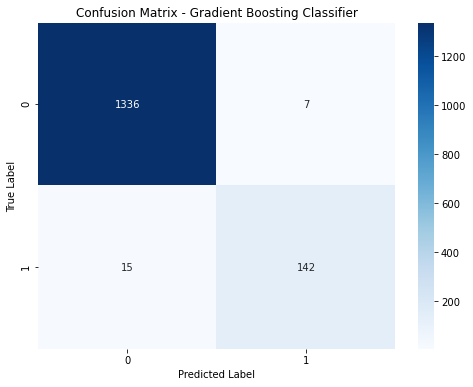

In [44]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_gradientboosting, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

# Documentation and Reporting

Introduction: This project focused on Thera Bank, a fictional financial institution aiming to increase its customer base of borrowers by targeting liability customers with personal loan offers while retaining them as depositors. The objective was to design an effective marketing campaign that would improve the success ratio and minimize costs through better target marketing techniques.

Approach: To achieve the project's goal, we developed a predictive model to identify liability customers with a higher probability of accepting a personal loan. We compared the performance of several classification models, including Logistic Regression, K-Nearest Neighbors (KNN), Naïve Bayes, and Gradient Boosting. After evaluating the models using metrics such as accuracy, precision, recall, and F1-score, Gradient Boosting emerged as the best model for predicting the likelihood of a liability customer accepting a personal loan offer.

Key Findings:

- Gradient Boosting exhibited exceptional performance compared to other models, achieving an accuracy of 99%, precision of 95%, recall of 90%, and an F1-score of 93%.

- The ensemble approach using a Voting Classifier did not significantly improve the performance beyond what was achieved by Gradient Boosting alone.

Conclusions: Based on our analysis, Gradient Boosting is recommended as the most suitable model for Thera Bank's marketing campaign. By utilizing this model, the bank can make targeted marketing decisions, increasing the success ratio of the campaign and reducing marketing costs associated with a broader audience. Gradient Boosting enables Thera Bank to identify potential customers with a higher likelihood of accepting a personal loan offer, resulting in improved business outcomes and higher conversion rates.